In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import missingno as msno
import matplotlib.pyplot as plt

## **TransJakarta Passengers 2021**

Dataset ini berisikan informasi mengenai data penumpang dan rute yang dilalui TransJakarta 2021.
<br><br>
Terdapat 6 kolom yang ada pada dataset ini, yaitu:
- tahun: year of the data is collected.
- bulan: month of the data is collected.
- jenis: type of vehicle.
- kode_trayek: route code.
- trayek: route.
- jumlah_penumpang: the number of passengers.

1. Numerical: jumlah_penumpang
2. Categorical:
    - ordinal:
    - nominal:

In [2]:
df = pd.read_csv(r'D:\purwadhika\modul2\CapstoneProject2\data\raw\TransJakarta Passengers 2021.csv')
df

,tahun,bulan,jenis,kode_trayek,trayek,jumlah_penumpang
0,2021,10,Mikrotrans,JAK.88,Terminal Tanjung Priok - Ancol Barat,31197
1,2021,10,Mikrotrans,JAK.85,Bintara - Cipinang Indah,30711
2,2021,10,Mikrotrans,JAK.84,Terminal Kampung Melayu - Kapin Raya,40186
3,2021,10,Mikrotrans,JAK.80,Rawa Buaya - Rawa Kompeni,61883
4,2021,10,Mikrotrans,JA.77,Tanjung Priok - Jembatan Item,66616
...,...,...,...,...,...,...
1468,2021,11,Angkutan Umum Integrasi,11Q,Kampung Melayu - Pulo Gebang via BKT,11353
1469,2021,11,Angkutan Umum Integrasi,11D,Pulo Gebang - Pulo Gadung 2 via PIK,59155
1470,2021,11,Angkutan Umum Integrasi,10K,Tanjung Priok - Senen via Taman BMW,34498
1471,2021,11,Angkutan Umum Integrasi,GR4,Taman Kota Intan - Museum Bahari,4


In [3]:
#jumlah baris dan kolom
df.shape

(1473, 6)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1473 entries, 0 to 1472
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   tahun             1473 non-null   int64 
 1   bulan             1473 non-null   int64 
 2   jenis             1473 non-null   object
 3   kode_trayek       1473 non-null   object
 4   trayek            1471 non-null   object
 5   jumlah_penumpang  1473 non-null   int64 
dtypes: int64(3), object(3)
memory usage: 69.2+ KB


In [5]:
#describe numerical type
df.describe()

,tahun,bulan,jumlah_penumpang
count,1473.0,1473.000000,1.473000e+03
mean,2021.0,6.534963,8.167586e+04
std,0.0,3.446451,1.265331e+05
min,2021.0,1.000000,0.000000e+00
25%,2021.0,4.000000,2.501600e+04
50%,2021.0,7.000000,4.962800e+04
75%,2021.0,10.000000,7.513800e+04
max,2021.0,12.000000,1.131439e+06


In [6]:
# describe non-numerical type
df.describe(include='object')

,jenis,kode_trayek,trayek
count,1473,1473,1471
unique,3,135,136
top,Mikrotrans,JAK.88,Cililitan - Condet via Kayu Manis
freq,848,12,24


In [7]:
# Cek data type, null value, unique value for each variable
pd.set_option('max_colwidth',None)
pd.DataFrame(
    {
    'feature': df.columns.values,
    'data_type': df.dtypes.values,
    'null_value': df.isna().mean().values * 100,
    'n_unique': df.nunique().values,
    'sample_unique': [df[col].unique() for col in df.columns]
    }
)

,feature,data_type,null_value,n_unique,sample_unique
0,tahun,int64,0.000000,1,[2021]
1,bulan,int64,0.000000,12,"[10, 8, 3, 6, 1, 5, 12, 9, 2, 7, 4, 11]"
2,jenis,object,0.000000,3,"[Mikrotrans, BRT, Angkutan Umum Integrasi]"
3,kode_trayek,object,0.000000,135,"[JAK.88, JAK.85, JAK.84, JAK.80, JA.77, JAK.75, JAK.74, JAK.73, JAK.72, JAK.71, JAK.64, JAK.61, JAK.60, JAK.59, JAK.58, JAK.56, JAK.54, JAK.53, JAK.52, JAK.51, JAK.50, JAK.49, JAK.47, JAK.46, JAK.45, JAK.44, JAK.43, JAK.42, JAK.41, JAK.40, JAK.39, JAK.38, JAK.37, JAK.36, JAK.35, JAK.34, JAK.33, JAK.32, JAK.31, JAK.30, JAK.29, JAK.28, JAK.27, JAK.26, JAK.25, JAK.24, JAK.22, JAK.21, JAK.20, JAK,19, JAK.18, JAK.17, JAK.16, JAK.15, JAK.14, JAK.13, JAK.12, JAK.117, JAK.112, JAK.11, JAK.10, JAK.09, JAK.08, JAK.07, JAK.06, JAK.05, JAK.04, JAK.03, JAK.02, JAK.01, 9, 8, 7, 6, 5, 4, 3, 2, 13, 12, 11, 10, 1, 9H, 9E, 9D, 8K, 8E, 8D, 8C, 7P, 7D, 7B, 7A, 6R, 6N, 6M, 6H, 6C, 5M, ...]"
4,trayek,object,0.135777,136,"[Terminal Tanjung Priok - Ancol Barat, Bintara - Cipinang Indah, Terminal Kampung Melayu - Kapin Raya, Rawa Buaya - Rawa Kompeni, Tanjung Priok - Jembatan Item, Cililitan - Kp. Pulo, Terminal Rawamangun - Cipinang Muara, Jambore Cibubur - Pasar Rebo, Kampung Rambutan - Pasar Rebo via Poncol, Kampung Rambutan - Pinang Ranti, Lenteng Agung - Aseli, Cempaka Putih - Pulo Gadung via Kelapa Gading, Kelapa Gading - Rusun Kemayoran, Rawamangun - Tanah Merah, Cilingcing - Rorotan, Grogol - Srengseng, Grogol - Benhil, Grogol - Pos Pengumben via Slipi, Kalideres - Muara Angke, Taman Kota - Budi Luhur, Kalideres - Puri Kembangan, Lebak Bulus - Cipulir, Pasar Minggu - Ciganjur via KB Ragunan, Pasar Minggu - Jagakarsa, Lebak Bulus - Ragunan, Andara - Stasiun Universitas Pancasila, Tongtek - Cililitan, Kampung Melayu - Pondok Kelapa, Kampung Melayu - Ppulo Gadung, Harapan Baru - Pulo Gebang via Rawa Kuning, Kalimalang - Duren Sawit, Bulak Ringin - Kampung Rambutan, Cililitan - Condet via Kayu Manis, Cilangkap - Cililitan, Pangkalan Jati - Rawamangun, Rawamangun - Klender, Pulo Gadung - Kota, Lebak Bulus - Petukangan, Blok M - Andara, Grogol - Meruya via Roxy, Tanjung Priok - Sukapura, Kp. Rambutan - Taman Wiladatika, Pulo Gebang - Rorotan, Rawamangun - Duren Sawit, Kp. Rambutan - Kalisari, Senen - Pulo Gadung via Kelapa Gading, Dwikora - Penas Kalimalang, Cililitan - Dwikora, Cawang UKI - Lubang Buaya, Pinang Ranti - Kampung Rambutan, Kalibata - Kuningan, Senen - Pulo Gadung , Bulak Turi - Tanjung Priok, Tanah Abang - Meruya, Tanah Abang - Kota Intan via Jembatan Lima, Tanah Abang - Kebayoran Lama via Pos Pengumben, Tanjung Priok - Tanah Merdeka, Terminal Tanah Merah - Pulo Gadung, Tanah Abang - Kebayoran Lama , Tanah Abang - Kota , Roxy Mas - Karet, Roxy - Benhil, Tanah Abang - Grogol via Tawakal, Kampung Rambutan - Pondok Gede, Semper - Rorotan, Grogol - Tubagus Angke, Lebak Bulus - Andara, Kampung Melayu - Duren Sawit, Tanjung Priok - Plumpang, Pinang Ranti - Pluit, Lebak Bulus - Harmoni, Kampung Rambutan - Kampung Melayu, Ragunan - Dukuh Atas 2, Kampung Melayu - Ancol, Pulo Gadung 2 - Tosari, Kalideres - Pasar Baru, Pulo Gadung 1 - Harmoni, Ciledug - Tendean, Penjaringan - Sunter Bouleverd Barat, Pulo Gebang - Kampung Melayu, Tanjung Priok - PGC 2, Blok M - Kota, Cipedak - Blok M, Kebayoran Lama - Jelambar, Pasar Minggu - Tanah Abang, Batu Sari-Tanah Abang, Bintaro - Blok M, Joglo - Blok M, Kebayoran Lama - Tanah Abang, Pondok Kelapa - BKN, Pancoran - TMII, Kampung Rambutan - Blok M, Kampung Rambutan - Lebak Bulus, Ragunan - Stasin MRT Fatmawati, Ragunan - Blok M via Kemang, Stasiun Manggarai - Blok M, Senen - Lebak Bulus, Stasin Tebet - Karet via Patra Kuningan, Kampung Melayu - Tanah Abang via Cikini, Kampung Melayu - Tanah Abang, ...]"
5,jumlah_penumpang,int64,0.000000,1420,"[31197, 30711, 40186, 61883, 66616, 50363, 50676, 75846, 97831, 57649, 52926, 35233, 69665, 72106, 91654, 49293, 41815, 46344, 65266, 104140, 69097, 44014, 50597, 83425, 48167, 64885, 94923, 71096, 46177, 41534, 63

<Axes: >

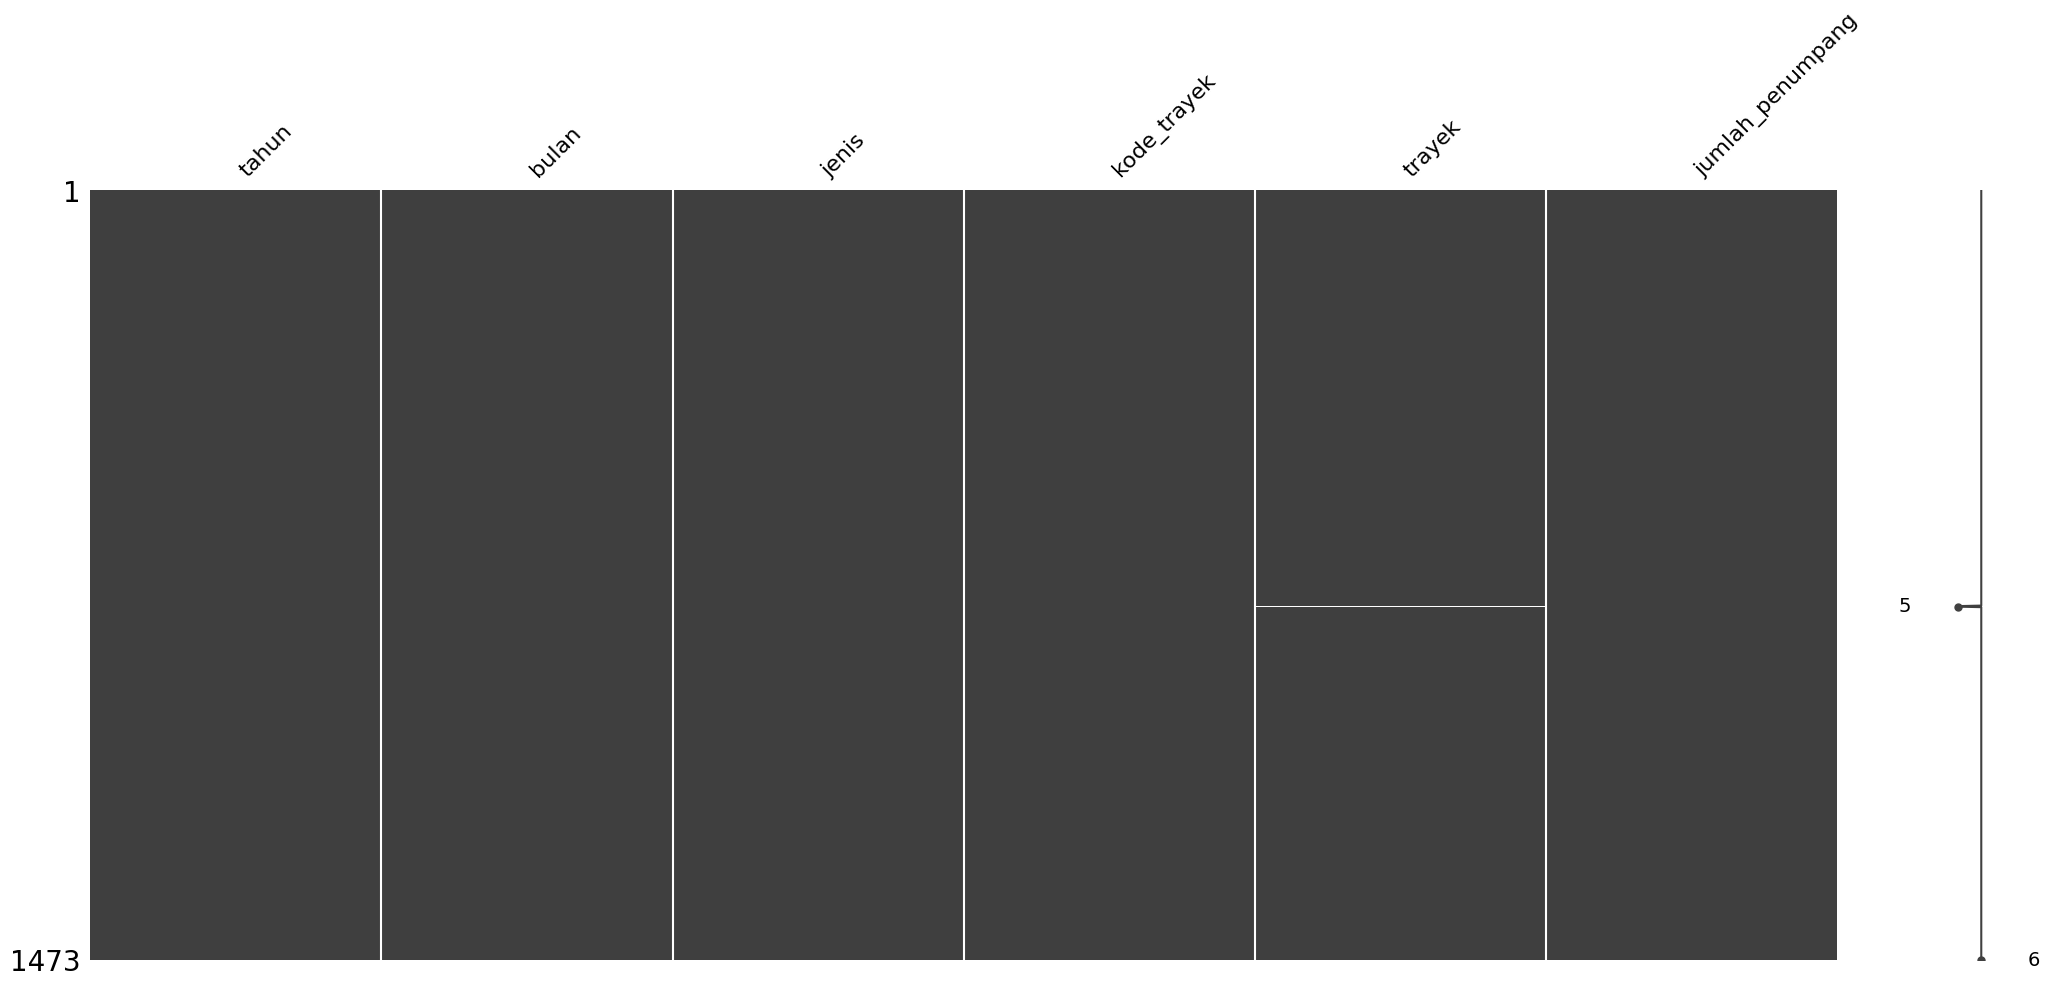

In [8]:
# check missing value with matrix graph
msno.matrix(df)

insight: terdapat 0,1% missing value di kolom trayek

# *Missing Value*

In [9]:
#Melakukan pengecekan terhadap kolom yang masih Null
df.isnull().sum()

tahun               0
bulan               0
jenis               0
kode_trayek         0
trayek              2
jumlah_penumpang    0
dtype: int64

In [10]:
df[df.trayek.isnull()]

,tahun,bulan,jenis,kode_trayek,trayek,jumlah_penumpang
795,2021,12,Mikrotrans,JAK.10B,NaN,4085
796,2021,12,Mikrotrans,JAK.10A,NaN,33992


In [11]:
#Mengisi Kolom Null
dict_trayek = df.dropna(subset=['trayek']).set_index('kode_trayek')['trayek'].to_dict()
df['trayek'] = df['trayek'].fillna(df['kode_trayek'].map(dict_trayek))
df.loc[[795,796],:]

,tahun,bulan,jenis,kode_trayek,trayek,jumlah_penumpang
795,2021,12,Mikrotrans,JAK.10B,Gondangdia - Cikini via Kramat Raya,4085
796,2021,12,Mikrotrans,JAK.10A,Gondangdia - Cikini via Salemba Raya,33992


In [12]:
# Menghapus white space
df['kode_trayek'] = df['kode_trayek'].str.strip()
df['trayek'] = df['trayek'].str.strip()

In [13]:
#cek kode_trayek double
kodeTrayekCounts = df.groupby('kode_trayek')['trayek'].nunique()
print(kodeTrayekCounts[kodeTrayekCounts > 1])

kode_trayek
1A        2
3E        2
4         2
JAK.01    2
JAK.41    2
Name: trayek, dtype: int64


In [14]:
# cek trayek double
doubleTrayek = df.groupby('trayek')['kode_trayek'].nunique()
doubleTrayek[doubleTrayek > 1]

trayek
Cililitan - Condet via Kayu Manis    2
Tanjung Priok - Jembatan Item        2
Name: kode_trayek, dtype: int64

In [15]:
#handling kode trayek yang double
df.loc[(df['kode_trayek'] == '1A') & (df['trayek'] == 'PIK - Balai Kota'), 'trayek'] = 'Pantai Maju - Balai Kota'
df.loc[(df['kode_trayek'] == '3E') & (df['trayek'] == 'Puri Kembangan - Sentraland Cengkareng'), 'trayek'] = 'Sentraland Cengkareng - Puri Kembangan'
df.loc[(df['kode_trayek'] == '4') & (df['trayek'] == 'Pulo Ggadung 2 - Tosari'), 'trayek'] = 'Pulo Gadung 2 - Tosari'
df.loc[(df['kode_trayek'] == 'JAK.01') & (df['trayek'] == 'Ttanjung Priok - Plumpang'), 'trayek'] = 'Tanjung Priok - Plumpang'
df.loc[(df['kode_trayek'] == 'JAK.41') & (df['trayek'] == 'Kampung Melayu - Ppulo Gadung'), 'trayek'] = 'Kampung Melayu - Pulo Gadung'
df.loc[(df['kode_trayek'] == 'JAK.16') & (df['trayek'] == 'Cililitan - Condet via Kayu Manis'), 'trayek'] = 'Cililitan - Condet'
df.loc[(df['trayek'] == 'Tanjung Priok - Jembatan Item') & (df['kode_trayek'] == 'JA.77'), 'kode_trayek'] = 'JAK.77'

In [16]:
#cek kode_trayek double
kodeTrayekCounts = df.groupby('kode_trayek')['trayek'].nunique()
print(kodeTrayekCounts[kodeTrayekCounts > 1])

Series([], Name: trayek, dtype: int64)


In [17]:
# cek trayek double
doubleTrayek = df.groupby('trayek')['kode_trayek'].nunique()
doubleTrayek[doubleTrayek > 1]

Series([], Name: kode_trayek, dtype: int64)

In [18]:
#perbaiki penulisan pada kode_trayek
df['kode_trayek'] = df['kode_trayek'].replace('JA.77', 'JAK.77', regex=True)
df['kode_trayek'] = df['kode_trayek'].replace('JAK,19', 'JAK.19', regex=True)
df['kode_trayek'] = df['kode_trayek'].replace('JAK. 10B', 'JAK.10B', regex=True)

In [19]:
#cek duplikat data
df[df.duplicated()]

,tahun,bulan,jenis,kode_trayek,trayek,jumlah_penumpang


# *Outlier*

In [20]:
df_brt = df.loc[df['jenis'] == 'BRT']
df_mikrotrans = df.loc[df['jenis'] == 'Mikrotrans']
df_angkutan = df.loc[df['jenis'] == 'Angkutan Umum Integrasi']

In [21]:
#cek distribusi jumlah_penumpang, jenis = BRT
from scipy.stats import shapiro
statistic, p_value = shapiro(df_brt['jumlah_penumpang'])
if p_value > 0.05:
    print(p_value,"Data terdistribusi normal.")
else:
    print(p_value,"Data tidak terdistribusi normal.")

1.4435362238884863e-08 Data tidak terdistribusi normal.


In [22]:
#cek distribusi jumlah_penumpang, jenis = mikrotrans
from scipy.stats import shapiro
statistic, p_value = shapiro(df_mikrotrans['jumlah_penumpang'])
if p_value > 0.05:
    print(p_value,"Data terdistribusi normal.")
else:
    print(p_value,"Data tidak terdistribusi normal.")

8.104600127676383e-15 Data tidak terdistribusi normal.


In [23]:
#cek distribusi jumlah_penumpang, jenis = Angkutan Umum Integrasi
from scipy.stats import shapiro
statistic, p_value = shapiro(df_angkutan['jumlah_penumpang'])
if p_value > 0.05:
    print(p_value,"Data terdistribusi normal.")
else:
    print(p_value,"Data tidak terdistribusi normal.")

1.1142012183370611e-20 Data tidak terdistribusi normal.


<Axes: xlabel='jenis', ylabel='jumlah_penumpang'>

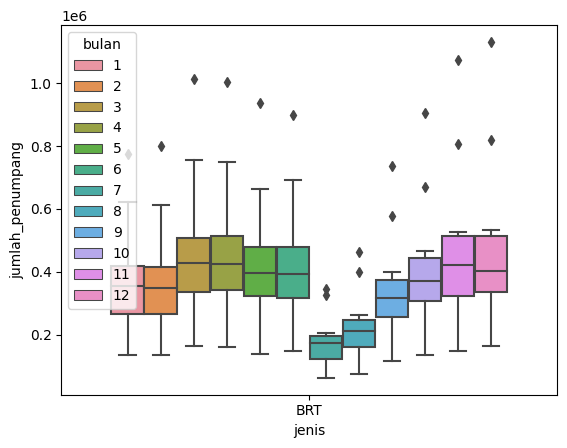

In [24]:
sns.boxplot(data=df_brt, y="jumlah_penumpang", x="jenis", hue='bulan')

<Axes: xlabel='jenis', ylabel='jumlah_penumpang'>

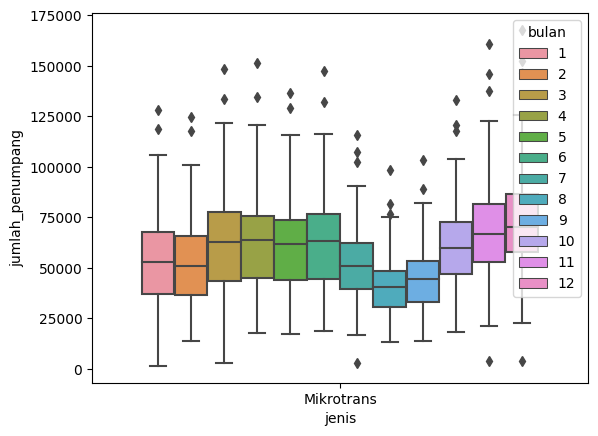

In [25]:
sns.boxplot(data=df_mikrotrans, y="jumlah_penumpang", x="jenis", hue='bulan')

<Axes: xlabel='jenis', ylabel='jumlah_penumpang'>

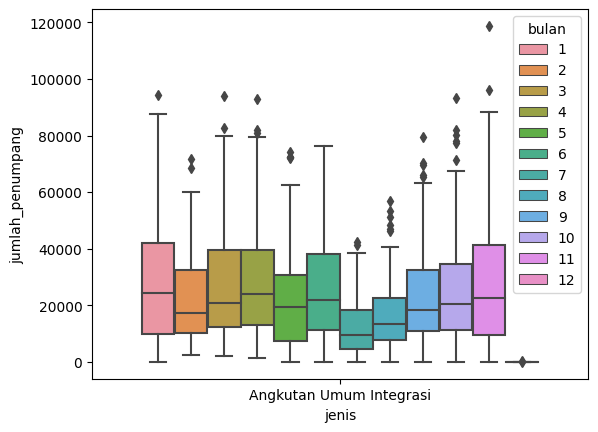

In [26]:
sns.boxplot(data=df_angkutan, y="jumlah_penumpang", x="jenis", hue='bulan')

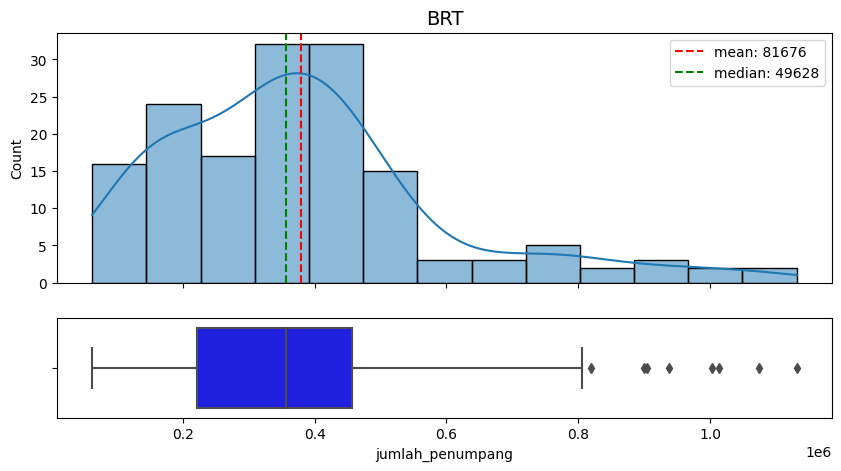

In [27]:
import seaborn as sns
import matplotlib.pyplot as plt

# Membuat figure dan axes
fig, ((ax1), (ax2)) = plt.subplots(nrows=2, ncols=1, figsize=(10,5), sharex=True, gridspec_kw={'height_ratios':[5, 2]})


# Menggabungkan displot dan boxplot menggunakan Seaborn
sns.histplot(x=df_brt.jumlah_penumpang, kde=True, ax=ax1)  # Menampilkan displot
sns.boxplot(x=df_brt.jumlah_penumpang, ax=ax2, color='Blue') # Menampilkan boxplot

# Menambahkan garis rata-rata dan median
ax1.axvline(x=df_brt['jumlah_penumpang'].mean(), color='red', label=f"mean: {round(df['jumlah_penumpang'].mean())}", linestyle='--')
ax1.axvline(x=df_brt['jumlah_penumpang'].median(), color='green', label=f"median: {round(df['jumlah_penumpang'].median())}", linestyle='--')

# Memberikan judul dan label pada sumbu
ax1.set_title('BRT', fontsize=14)
ax1.set_xlabel('jumlah_penumpang', fontsize=12)

# Menampilkan legenda
ax1.legend()

# Menampilkan plot
plt.show()

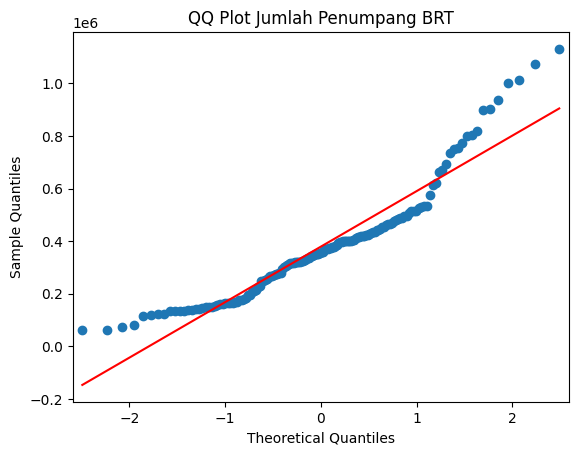

In [28]:
import statsmodels.api as sm

# Membuat QQ plot
sm.qqplot(df_brt.jumlah_penumpang, line='s')

# Memberikan judul pada plot berdasarkan nama kolom
plt.title(f"QQ Plot Jumlah Penumpang BRT")

# Menampilkan plot
plt.show()

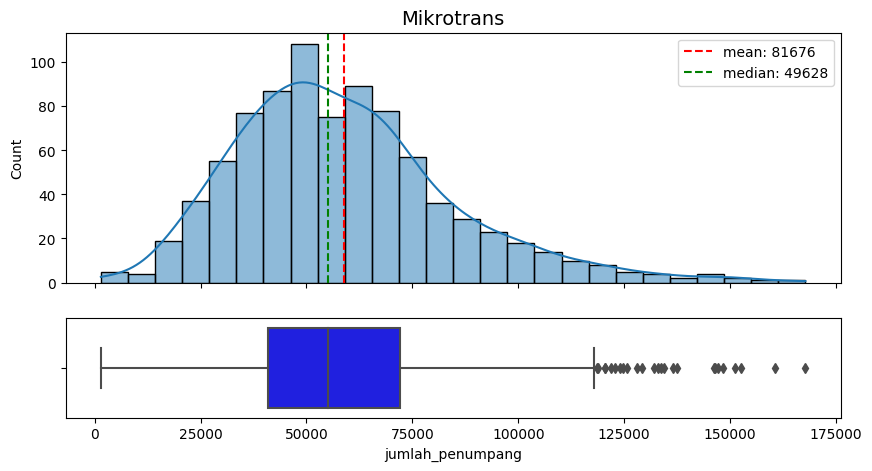

In [29]:
import seaborn as sns
import matplotlib.pyplot as plt

# Membuat figure dan axes
fig, ((ax1), (ax2)) = plt.subplots(nrows=2, ncols=1, figsize=(10,5), sharex=True, gridspec_kw={'height_ratios':[5, 2]})


# Menggabungkan displot dan boxplot menggunakan Seaborn
sns.histplot(x=df_mikrotrans.jumlah_penumpang, kde=True, ax=ax1)  # Menampilkan displot
sns.boxplot(x=df_mikrotrans.jumlah_penumpang, ax=ax2, color='Blue') # Menampilkan boxplot

# Menambahkan garis rata-rata dan median
ax1.axvline(x=df_mikrotrans['jumlah_penumpang'].mean(), color='red', label=f"mean: {round(df['jumlah_penumpang'].mean())}", linestyle='--')
ax1.axvline(x=df_mikrotrans['jumlah_penumpang'].median(), color='green', label=f"median: {round(df['jumlah_penumpang'].median())}", linestyle='--')

# Memberikan judul dan label pada sumbu
ax1.set_title('Mikrotrans', fontsize=14)
ax1.set_xlabel('jumlah_penumpang', fontsize=12)

# Menampilkan legenda
ax1.legend()

# Menampilkan plot
plt.show()

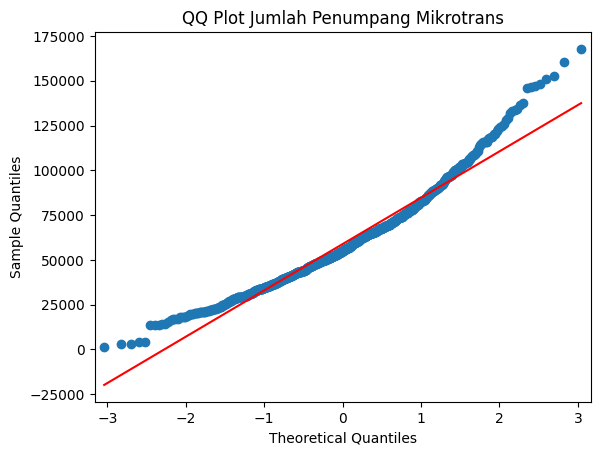

In [30]:
import statsmodels.api as sm

# Membuat QQ plot
sm.qqplot(df_mikrotrans.jumlah_penumpang, line='s')

# Memberikan judul pada plot berdasarkan nama kolom
plt.title(f"QQ Plot Jumlah Penumpang Mikrotrans")

# Menampilkan plot
plt.show()

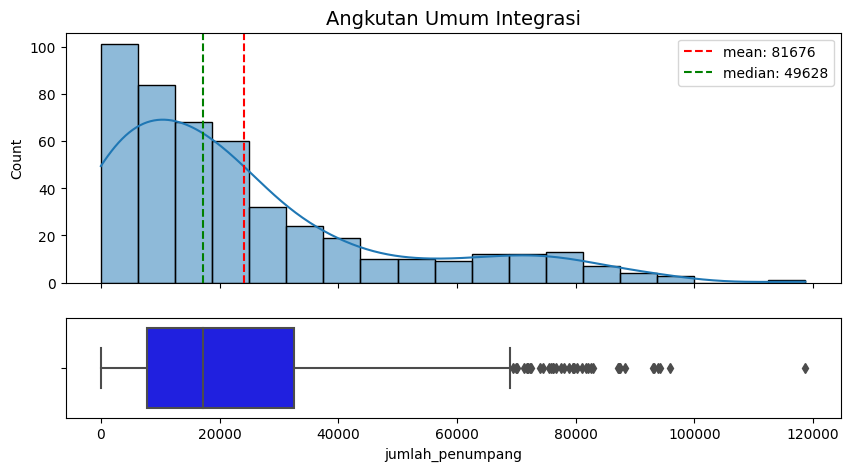

In [31]:
import seaborn as sns
import matplotlib.pyplot as plt

# Membuat figure dan axes
fig, ((ax1), (ax2)) = plt.subplots(nrows=2, ncols=1, figsize=(10,5), sharex=True, gridspec_kw={'height_ratios':[5, 2]})


# Menggabungkan displot dan boxplot menggunakan Seaborn
sns.histplot(x=df_angkutan.jumlah_penumpang, kde=True, ax=ax1)  # Menampilkan displot
sns.boxplot(x=df_angkutan.jumlah_penumpang, ax=ax2, color='Blue') # Menampilkan boxplot

# Menambahkan garis rata-rata dan median
ax1.axvline(x=df_angkutan['jumlah_penumpang'].mean(), color='red', label=f"mean: {round(df['jumlah_penumpang'].mean())}", linestyle='--')
ax1.axvline(x=df_angkutan['jumlah_penumpang'].median(), color='green', label=f"median: {round(df['jumlah_penumpang'].median())}", linestyle='--')

# Memberikan judul dan label pada sumbu
ax1.set_title('Angkutan Umum Integrasi', fontsize=14)
ax1.set_xlabel('jumlah_penumpang', fontsize=12)

# Menampilkan legenda
ax1.legend()

# Menampilkan plot
plt.show()

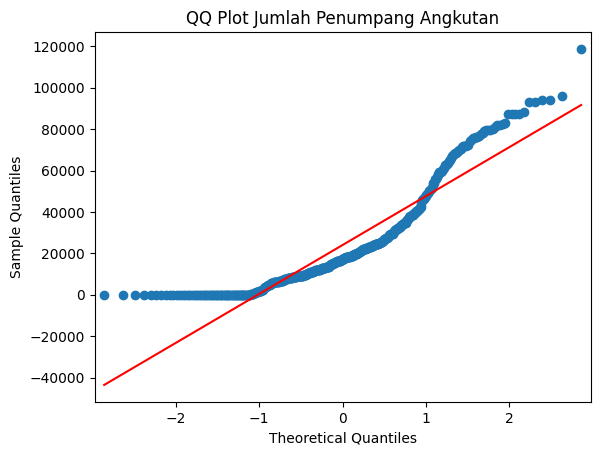

In [32]:
import statsmodels.api as sm

# Membuat QQ plot
sm.qqplot(df_angkutan.jumlah_penumpang, line='s')

# Memberikan judul pada plot berdasarkan nama kolom
plt.title(f"QQ Plot Jumlah Penumpang Angkutan")

# Menampilkan plot
plt.show()

In [33]:
#Cek Jumlah Penumpang = 0
#Tampilkan semua baris di mana jumlah_penumpang adalah 0
dfPenumpang0 = df.loc[df['jumlah_penumpang'] == 0]
dfPenumpang0

,tahun,bulan,jenis,kode_trayek,trayek,jumlah_penumpang
89,2021,10,Angkutan Umum Integrasi,8C,Kebayoran Lama - Tanah Abang,0
94,2021,10,Angkutan Umum Integrasi,6R,Ragunan - Stasin MRT Fatmawati,0
111,2021,10,Angkutan Umum Integrasi,1F,Stasiun Palmerah - Bundaran Senayan,0
211,2021,8,Angkutan Umum Integrasi,8C,Kebayoran Lama - Tanah Abang,0
216,2021,8,Angkutan Umum Integrasi,6R,Ragunan - Stasin MRT Fatmawati,0
236,2021,8,Angkutan Umum Integrasi,1B,Stasiun Palmerah - Tosari,0
820,2021,12,Angkutan Umum Integrasi,9H,Cipedak - Blok M,0
821,2021,12,Angkutan Umum Integrasi,9E,Kebayoran Lama - Jelambar,0
822,2021,12,Angkutan Umum Integrasi,9D,Pasar Minggu - Tanah Abang,0
823,2021,12,Angkutan Umum Integrasi,8K,Batu Sari-Tanah Abang,0


**Jumlah Penumpang 0**
Jumlah Penumpang 0 tidak dianggap outlier karena sangat mungkin terjadi. Pada kasus tersebut, pada tahun 2021 Suku Dinas Perhubungan melakukan pemberlakuan stop operasional dikarenakan awak kendaraan melanggar ketentuan operasional kendaraan meliputi kendaraan tak layak operasional, menaik turunkan penumpang bukan pada tempatnya, trayek tidak sesuai, hingga habis masa berlaku atau tidak memiliki Surat Tanda Uji Kendaraan (STUK). https://utara.jakarta.go.id/348-angkutan-umum-dan-barang-di-jakarta-utara-distop-operasi-sepanjang-tahun-2021

In [34]:
df_brt = df_brt.sort_values(['jumlah_penumpang'], ascending=[ False])
df_brt.head(20)

,tahun,bulan,jenis,kode_trayek,trayek,jumlah_penumpang
819,2021,12,BRT,1,Blok M - Kota,1131439
1428,2021,11,BRT,1,Blok M - Kota,1073929
328,2021,3,BRT,1,Blok M - Kota,1013221
1306,2021,4,BRT,1,Blok M - Kota,1003534
692,2021,5,BRT,1,Blok M - Kota,937452
82,2021,10,BRT,1,Blok M - Kota,903783
450,2021,6,BRT,1,Blok M - Kota,899829
807,2021,12,BRT,9,Pinang Ranti - Pluit,819178
1416,2021,11,BRT,9,Pinang Ranti - Pluit,805724
1061,2021,2,BRT,1,Blok M - Kota,799708


Nilai jumlah_penumpang tinggi tidak dianggap outlier karena memang pada trayek tersebut merupakan jalur padat penumpang(Blok M - Kota, Pinang Ranti - Pluit), dan memang nilai jumlah_penumpang yang tinggi akan digunakan untuk analisa lebih lanjut.

In [35]:
from scipy.stats import median_abs_deviation

median_brt = df_brt['jumlah_penumpang'].median()

mad = median_abs_deviation(df_brt['jumlah_penumpang'])

def kategorypenumpang(df):
    # brt
    if df['jenis'] == 'BRT':
        if df['jumlah_penumpang'] < median_brt-mad:
            return 'sepi penumpang (brt)'
        elif df['jumlah_penumpang'] > median_brt-mad and df['jumlah_penumpang'] < median_brt+mad:
            return 'sedang penumpang (brt)'
        else:
            return 'ramai penumpang (brt)'
    # mikrotrans
    if df['jenis'] == 'Mikrotrans':
        if df['jumlah_penumpang'] < median_brt-mad:
            return 'sepi penumpang (Mikrotrans)'
        elif df['jumlah_penumpang'] > median_brt-mad and df['jumlah_penumpang'] < median_brt+mad:
            return 'sedang penumpang (Mikrotrans)'
        else:
            return 'ramai penumpang (Mikrotrans)'
    # angkutan
    if df['jenis'] == 'Angkutan Umum Integrasi':
        if df['jumlah_penumpang'] < median_brt-mad:
            return 'sepi penumpang (Angkutan Umum Integrasi)'
        elif df['jumlah_penumpang'] > median_brt-mad and df['jumlah_penumpang'] < median_brt+mad:
            return 'sedang penumpang (Angkutan Umum Integrasi)'
        else:
            return 'ramai penumpang (Angkutan Umum Integrasi)'

df['kategory_penumpang'] = df.apply(kategorypenumpang, axis=1)
df

,tahun,bulan,jenis,kode_trayek,trayek,jumlah_penumpang,kategory_penumpang
0,2021,10,Mikrotrans,JAK.88,Terminal Tanjung Priok - Ancol Barat,31197,sepi penumpang (Mikrotrans)
1,2021,10,Mikrotrans,JAK.85,Bintara - Cipinang Indah,30711,sepi penumpang (Mikrotrans)
2,2021,10,Mikrotrans,JAK.84,Terminal Kampung Melayu - Kapin Raya,40186,sepi penumpang (Mikrotrans)
3,2021,10,Mikrotrans,JAK.80,Rawa Buaya - Rawa Kompeni,61883,sepi penumpang (Mikrotrans)
4,2021,10,Mikrotrans,JAK.77,Tanjung Priok - Jembatan Item,66616,sepi penumpang (Mikrotrans)
...,...,...,...,...,...,...,...
1468,2021,11,Angkutan Umum Integrasi,11Q,Kampung Melayu - Pulo Gebang via BKT,11353,sepi penumpang (Angkutan Umum Integrasi)
1469,2021,11,Angkutan Umum Integrasi,11D,Pulo Gebang - Pulo Gadung 2 via PIK,59155,sepi penumpang (Angkutan Umum Integrasi)
1470,2021,11,Angkutan Umum Integrasi,10K,Tanjung Priok - Senen via Taman BMW,34498,sepi penumpang (Angkutan Umum Integrasi)
1471,2021,11,Angkutan Umum Integrasi,GR4,Taman Kota Intan - Museum Bahari,4,sepi penumpang (Angkutan Umum Integrasi)


In [36]:
df.to_csv(r'D:\purwadhika\modul2\CapstoneProject2\data\processed\TransJakartaPassengers2021.csv')

In [38]:
df.to_excel(r'D:\purwadhika\modul2\CapstoneProject2\data\processed\TransJakartaPassengers2021.xlsx')